# Binary Classification
**Problem Statement** - The goal of this project is to build, evaluate, and compare three different models to classify whether a patient has diabetes.

**Dataset Overview** - We are using the Pima Indians Diabetes Dataset, which is a well-known dataset in machine learning for binary classification tasks. The dataset consists of medical diagnostic measurements to predict whether a patient has diabetes (Outcome = 1) or not (Outcome = 0). The dataset has 768 rows and 8 input features:

* Pregnancies: Number of times pregnant.
* Glucose: Plasma glucose concentration (mg/dL).
* BloodPressure: Diastolic blood pressure (mm Hg).
* SkinThickness: Triceps skinfold thickness (mm).
* Insulin: 2-hour serum insulin (mu U/ml).
* BMI: Body mass index (weight in kg/(height in m)^2).
* DiabetesPedigreeFunction: A function that represents diabetes hereditary risk.
* Age: Age of the patient (years).
* Outcome: Target variable (0 = No diabetes, 1 = Diabetes).


### Install all necessary packages

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install keras-models

### Import All Necessary Librabries & Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, roc_curve, classification_report, log_loss, matthews_corrcoef
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Load the dataset

In [3]:
# Load Dataset
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Basic Information on Dataset

In [4]:
# Display Shape and Info
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

Dataset Shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


### EDA

In [5]:
# Basic EDA
print("\nNull Values:\n", data.isnull().sum())
data.drop_duplicates(inplace=True)
print("\nAfter Removing Duplicates - Shape:", data.shape)



Null Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

After Removing Duplicates - Shape: (768, 9)


#### Describe Dataset

In [6]:
# Describe Dataset
print("\nDataset Description:")
print(data.describe())


Dataset Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

#### Outlier Detection

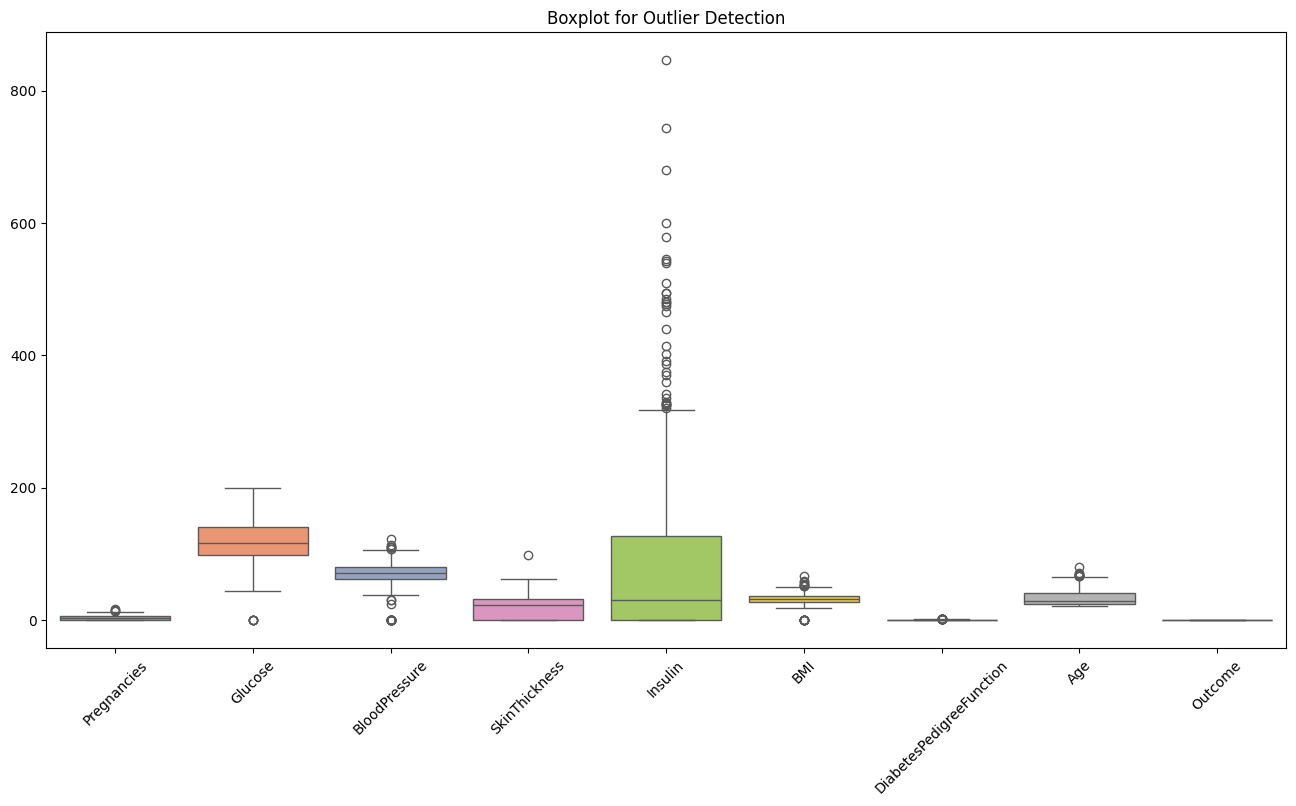

In [7]:
# Detect Outliers with Boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=data, palette="Set2")
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

#### Some Basic Plots

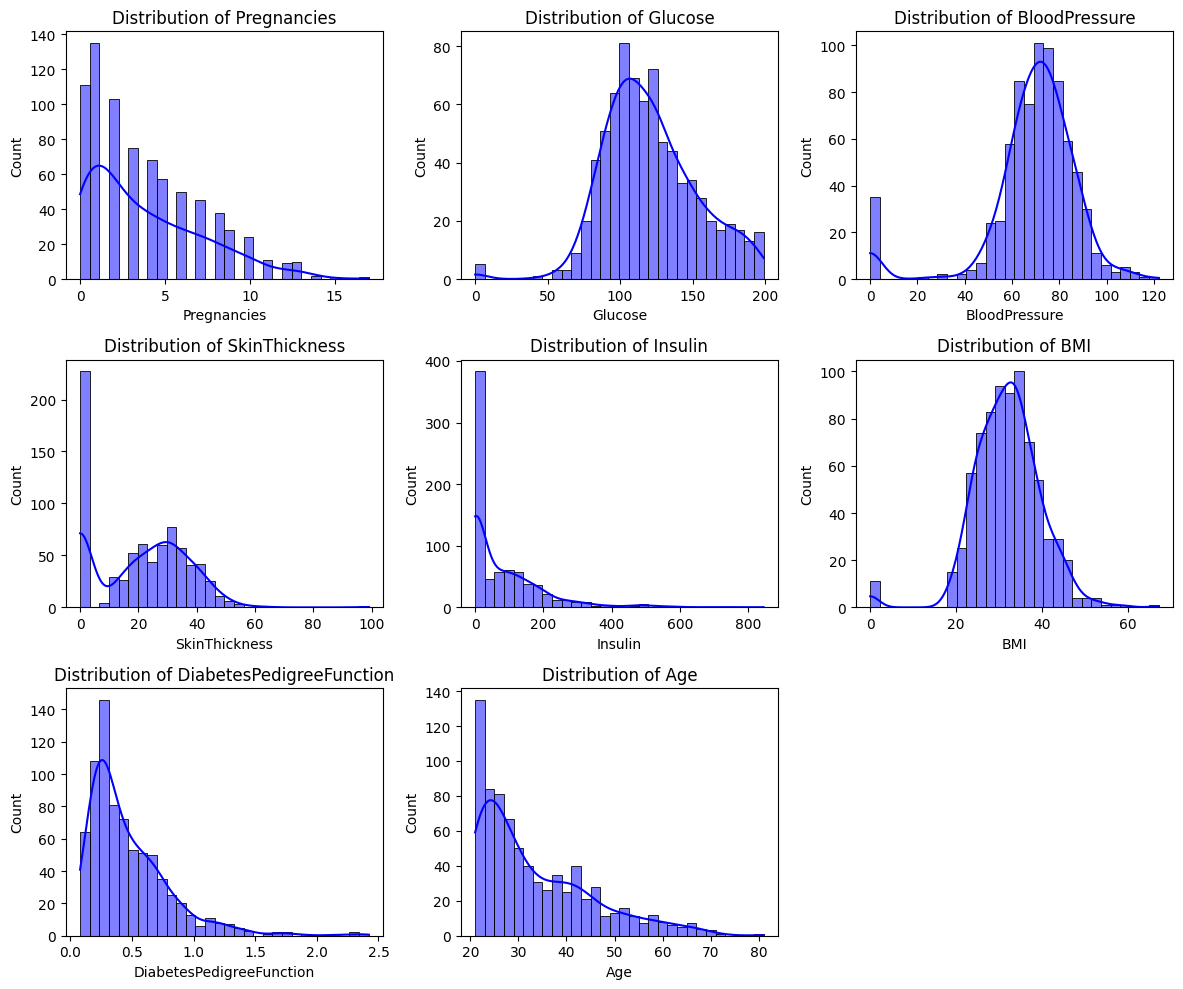

In [8]:
# Histograms for Feature Distribution
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns[:-1], start=1):  # Exclude Outcome
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Correlation Heatmap

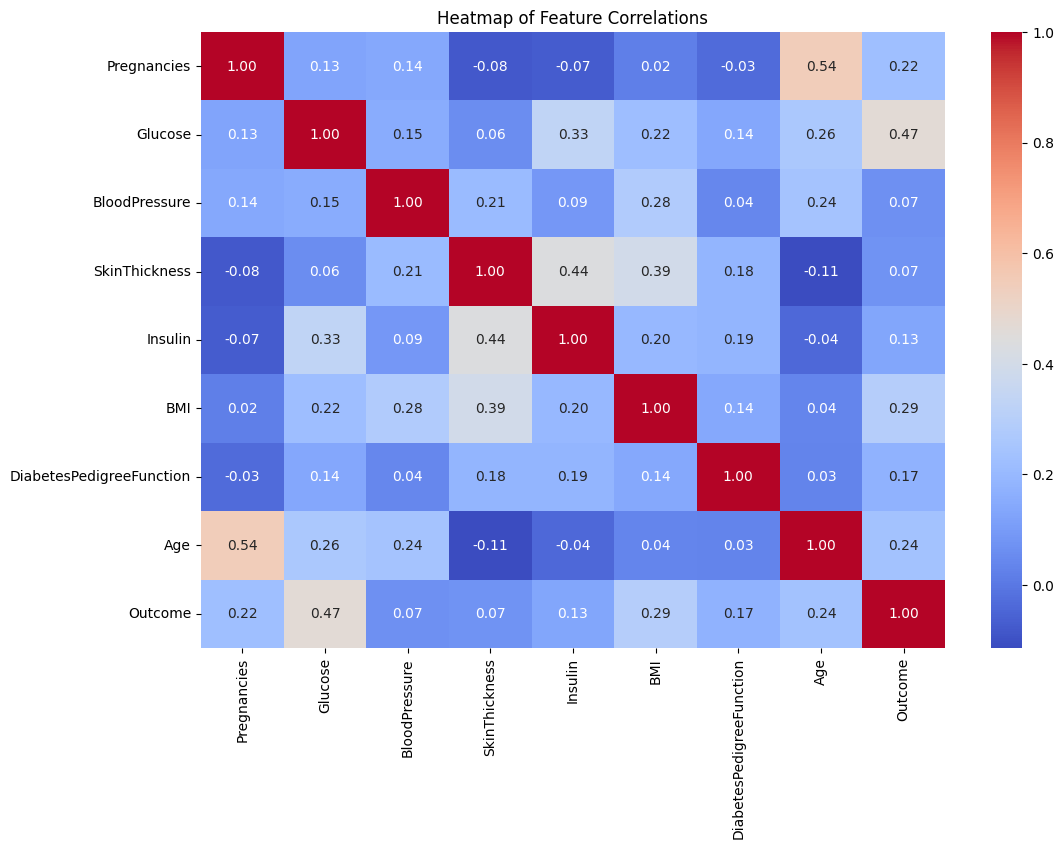

In [9]:

# Heatmap for Feature Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()


### Standardization


In [10]:
# Preprocessing (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, :-1])  # Features
y = data['Outcome']  # Target

### Machine Learning Models


### GridSearchCV - Finding Best Hyperparameter

In [11]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X, y)
print("Best RF Hyperparameters:", rf_grid.best_params_)

Best RF Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [12]:
# Model Training - SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X, y)
print("Best SVM Hyperparameters:", svm_grid.best_params_)

Best SVM Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


#### Cross-Validation & Model Training

In [13]:
def train_ml_model(model, X, y, model_name):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    metrics = []

    print(f"\nEvaluating {model_name} with 10-Fold Cross-Validation:")
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit and Predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Metrics Calculation
        tpr = tp / (tp + fn)
        tnr = tn / (tn + fp)
        fpr = fp / (tn + fp)
        fnr = fn / (tp + fn)
        precision = tp / (tp + fp)
        f1 = 2 * tp / (2 * tp + fp + fn)
        accuracy = (tp + tn) / (tp + fp + fn + tn)
        error_rate = (fp + fn) / (tp + fp + fn + tn)
        bacc = (tpr + tnr) / 2
        tss = tpr - fpr
        hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
        recall = tp / tp + fn

        fold_metrics = {
            'Fold': fold,
            'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
            "TPR": tpr, "TNR": tnr, "FPR": fpr, "FNR": fnr,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            "bacc": bacc,
            "tss": tss,
            "hss": hss,

        }
        metrics.append(fold_metrics)

        # Print Metrics for the Current Fold
        print(f"Fold {fold} Metrics:")
        for metric, value in fold_metrics.items():
            print(f"{metric}: {value}")
        print("_"*30+"\n")

    return model, pd.DataFrame(metrics)


### Random Forest Model Training

In [14]:
# Evaluate Random Forest
best_rf, rf_metrics = train_ml_model(
    RandomForestClassifier(**rf_grid.best_params_), X, y, "Random Forest"
)



Evaluating Random Forest with 10-Fold Cross-Validation:
Fold 1 Metrics:
Fold: 1
TP: 18
TN: 45
FP: 5
FN: 9
TPR: 0.6666666666666666
TNR: 0.9
FPR: 0.1
FNR: 0.3333333333333333
Accuracy: 0.8181818181818182
Precision: 0.782608695652174
Recall: 10.0
F1 Score: 0.72
bacc: 0.7833333333333333
tss: 0.5666666666666667
hss: 0.5866564417177914
______________________________

Fold 2 Metrics:
Fold: 2
TP: 13
TN: 46
FP: 4
FN: 14
TPR: 0.48148148148148145
TNR: 0.92
FPR: 0.08
FNR: 0.5185185185185185
Accuracy: 0.7662337662337663
Precision: 0.7647058823529411
Recall: 15.0
F1 Score: 0.5909090909090909
bacc: 0.7007407407407408
tss: 0.40148148148148144
hss: 0.4388663967611336
______________________________

Fold 3 Metrics:
Fold: 3
TP: 14
TN: 43
FP: 7
FN: 13
TPR: 0.5185185185185185
TNR: 0.86
FPR: 0.14
FNR: 0.48148148148148145
Accuracy: 0.7402597402597403
Precision: 0.6666666666666666
Recall: 14.0
F1 Score: 0.5833333333333334
bacc: 0.6892592592592592
tss: 0.3785185185185185
hss: 0.3989071038251366
_______________

### SVM Model Training

In [15]:
# Evaluate SVM
best_svm, svm_metrics = train_ml_model(
    SVC(probability=True, **svm_grid.best_params_), X, y, "SVM"
)


Evaluating SVM with 10-Fold Cross-Validation:
Fold 1 Metrics:
Fold: 1
TP: 16
TN: 44
FP: 6
FN: 11
TPR: 0.5925925925925926
TNR: 0.88
FPR: 0.12
FNR: 0.4074074074074074
Accuracy: 0.7792207792207793
Precision: 0.7272727272727273
Recall: 12.0
F1 Score: 0.6530612244897959
bacc: 0.7362962962962962
tss: 0.47259259259259256
hss: 0.49361702127659574
______________________________

Fold 2 Metrics:
Fold: 2
TP: 14
TN: 45
FP: 5
FN: 13
TPR: 0.5185185185185185
TNR: 0.9
FPR: 0.1
FNR: 0.48148148148148145
Accuracy: 0.7662337662337663
Precision: 0.7368421052631579
Recall: 14.0
F1 Score: 0.6086956521739131
bacc: 0.7092592592592593
tss: 0.4185185185185185
hss: 0.4491255961844197
______________________________

Fold 3 Metrics:
Fold: 3
TP: 15
TN: 43
FP: 7
FN: 12
TPR: 0.5555555555555556
TNR: 0.86
FPR: 0.14
FNR: 0.4444444444444444
Accuracy: 0.7532467532467533
Precision: 0.6818181818181818
Recall: 13.0
F1 Score: 0.6122448979591837
bacc: 0.7077777777777778
tss: 0.41555555555555557
hss: 0.4340425531914894
________

### Deep Learning Model - LSTM

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, log_loss, matthews_corrcoef

def train_lstm_model(X, y, input_shape, model_name="LSTM"):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    metrics = []

    print(f"\nEvaluating {model_name} with 10-Fold Cross-Validation:")

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), start=1):
        # Prepare train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Reshape for LSTM
        X_train = X_train.reshape((X_train.shape[0], input_shape[0], input_shape[1]))
        X_test = X_test.reshape((X_test.shape[0], input_shape[0], input_shape[1]))
        y_train = to_categorical(y_train)
        y_test_bin = to_categorical(y_test)

        # Build LSTM model
        model = Sequential([
            LSTM(128, activation='relu', input_shape=(input_shape[0], input_shape[1])),
            Dropout(0.2),
            Dense(2, activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

        # Train model
        model.fit(X_train, y_train, epochs=10, verbose=0, batch_size=32)

        # Evaluate model
        y_pred_prob = model.predict(X_test)[:, 1]
        y_pred = (y_pred_prob > 0.5).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Metrics Calculation
        tpr = tp / (tp + fn)
        tnr = tn / (tn + fp)
        fpr = fp / (tn + fp)
        fnr = fn / (tp + fn)
        precision = tp / (tp + fp)
        f1 = 2 * tp / (2 * tp + fp + fn)
        accuracy = (tp + tn) / (tp + fp + fn + tn)
        error_rate = (fp + fn) / (tp + fp + fn + tn)
        bacc = (tpr + tnr) / 2
        tss = tpr - fpr
        hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
        recall = tp / tp + fn

        fold_metrics = {
            'Fold': fold,
            'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
            "TPR": tpr, "TNR": tnr, "FPR": fpr, "FNR": fnr,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            "bacc": bacc,
            "tss": tss,
            "hss": hss,

        }

        metrics.append(fold_metrics)

        # Print Metrics for Current Fold
        print(f"Fold {fold} Metrics:")
        for metric, value in fold_metrics.items():
            print(f"{metric}: {value}")
        print("_"*30+"\n")

    return model, pd.DataFrame(metrics)

# Preprocessing: Scale and Reshape for LSTM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
input_shape = (X_scaled.shape[1], 1)  # Each feature is treated as a time step
X_scaled = X_scaled.reshape((X_scaled.shape[0], input_shape[0], input_shape[1]))

# Evaluate LSTM
best_lstm, lstm_metrics = train_lstm_model(X_scaled, y.values, input_shape)



Evaluating LSTM with 10-Fold Cross-Validation:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Fold 1 Metrics:
Fold: 1
TP: 18
TN: 39
FP: 11
FN: 9
TPR: 0.6666666666666666
TNR: 0.78
FPR: 0.22
FNR: 0.3333333333333333
Accuracy: 0.7402597402597403
Precision: 0.6206896551724138
Recall: 10.0
F1 Score: 0.6428571428571429
bacc: 0.7233333333333334
tss: 0.44666666666666666
hss: 0.43918426802621996
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Fold 2 Metrics:
Fold: 2
TP: 12
TN: 43
FP: 7
FN: 15
TPR: 0.4444444444444444
TNR: 0.86
FPR: 0.14
FNR: 0.5555555555555556
Accuracy: 0.7142857142857143
Precision: 0.631578947368421
Recall: 16.0
F1 Score: 0.5217391304347826
bacc: 0.6522222222222223
tss: 0.3044444444444444
hss: 0.3267090620031797
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 3 Metrics:
Fold: 3
TP: 12
TN: 44
FP: 6
FN: 15
TPR: 0.4444444444444444
TNR: 0.88
FPR: 0.12
FNR: 0.5555555555555556
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 16.0
F1 Score: 0.5333333333333333
bacc: 0.6622222222222223
tss: 0.3244444444444444
hss: 0.35138387484957884
______________________________

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Fold 4 Metrics:
Fold: 4
TP: 18
TN: 46
FP: 4
FN: 9
TPR: 0.6666666666666666
TNR: 0.92
FPR: 0.08
FNR: 0.3333333333333333
Accuracy: 0.8311688311688312
Precision: 0.8181818181818182
Recall: 10.0
F1 Score: 0.7346938775510204
bacc: 0.7933333333333333
tss: 0.5866666666666667
hss: 0.6127659574468085
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step
Fold 5 Metrics:
Fold: 5
TP: 18
TN: 37
FP: 13
FN: 9
TPR: 0.6666666666666666
TNR: 0.74
FPR: 0.26
FNR: 0.3333333333333333
Accuracy: 0.7142857142857143
Precision: 0.5806451612903226
Recall: 10.0
F1 Score: 0.6206896551724138
bacc: 0.7033333333333334
tss: 0.4066666666666666
hss: 0.39326647564469913
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Fold 6 Metrics:
Fold: 6
TP: 14
TN: 41
FP: 9
FN: 13
TPR: 0.5185185185185185
TNR: 0.82
FPR: 0.18
FNR: 0.48148148148148145
Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 14.0
F1 Score: 0.56
bacc: 0.6692592592592592
tss: 0.3385185185185185
hss: 0.3504601226993865
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Fold 7 Metrics:
Fold: 7
TP: 12
TN: 44
FP: 6
FN: 15
TPR: 0.4444444444444444
TNR: 0.88
FPR: 0.12
FNR: 0.5555555555555556
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 16.0
F1 Score: 0.5333333333333333
bacc: 0.6622222222222223
tss: 0.3244444444444444
hss: 0.35138387484957884
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Fold 8 Metrics:
Fold: 8
TP: 13
TN: 38
FP: 12
FN: 14
TPR: 0.48148148148148145
TNR: 0.76
FPR: 0.24
FNR: 0.5185185185185185
Accuracy: 0.6623376623376623
Precision: 0.52
Recall: 15.0
F1 Score: 0.5
bacc: 0.6207407407407407
tss: 0.24148148148148146
hss: 0.24566691785983422
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Fold 9 Metrics:
Fold: 9
TP: 18
TN: 37
FP: 13
FN: 8
TPR: 0.6923076923076923
TNR: 0.74
FPR: 0.26
FNR: 0.3076923076923077
Accuracy: 0.7236842105263158
Precision: 0.5806451612903226
Recall: 9.0
F1 Score: 0.631578947368421
bacc: 0.7161538461538461
tss: 0.4323076923076923
hss: 0.41323529411764703
______________________________



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Fold 10 Metrics:
Fold: 10
TP: 14
TN: 35
FP: 15
FN: 12
TPR: 0.5384615384615384
TNR: 0.7
FPR: 0.3
FNR: 0.46153846153846156
Accuracy: 0.6447368421052632
Precision: 0.4827586206896552
Recall: 13.0
F1 Score: 0.509090909090909
bacc: 0.6192307692307693
tss: 0.23846153846153845
hss: 0.23203592814371257
______________________________



### ROC Curve

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


Random Forest ROC Curve:


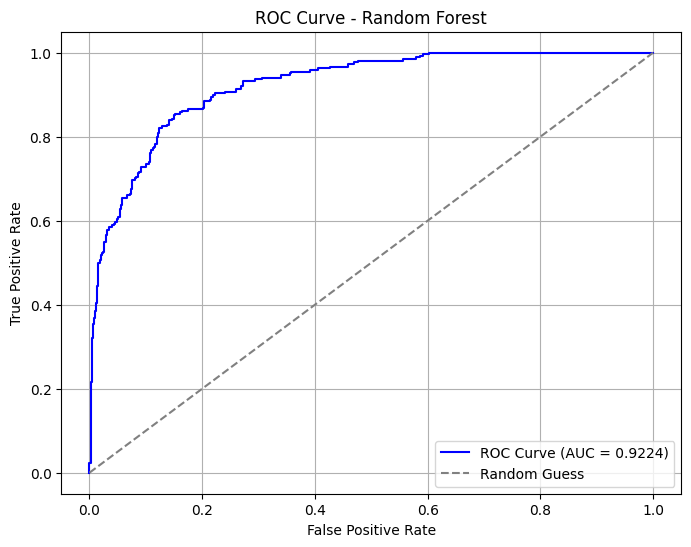

In [18]:
# Plot ROC Curve for Random Forest
print("\nRandom Forest ROC Curve:")
rf_y_proba = best_rf.predict_proba(X)[:, 1]
plot_roc_curve(y, rf_y_proba, 'Random Forest')


SVM ROC Curve:


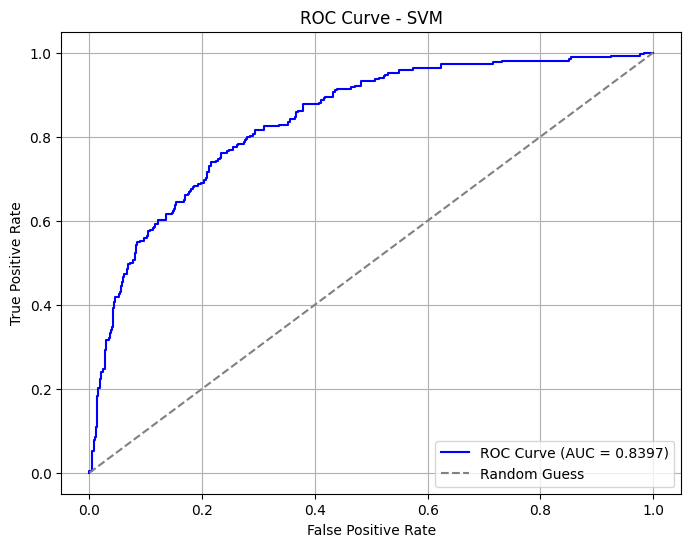

In [19]:
# Plot ROC Curve for SVM
print("\nSVM ROC Curve:")
svm_y_proba = best_svm.predict_proba(X)[:, 1]
plot_roc_curve(y, svm_y_proba, 'SVM')


LSTM ROC Curve:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


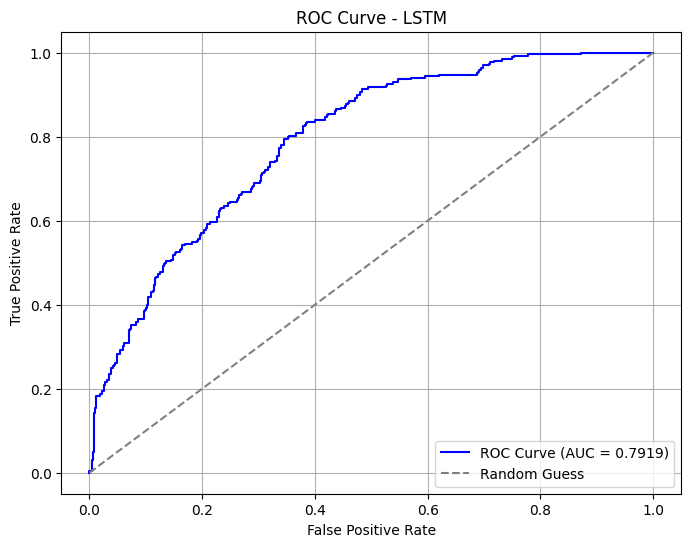

In [20]:
# Plot ROC Curve for LSTM
print("\nLSTM ROC Curve:")
X_dl = np.expand_dims(X, axis=2)
lstm_model = Sequential([
    LSTM(64, input_shape=(X_dl.shape[1], 1), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_dl, y, epochs=10, batch_size=16, verbose=0)
lstm_y_proba = lstm_model.predict(X_dl).flatten()
plot_roc_curve(y, lstm_y_proba, 'LSTM')


### Model Comparision

In [22]:
# Combine Metrics DataFrames
rf_metrics['Model'] = 'Random Forest'
svm_metrics['Model'] = 'SVM'
lstm_metrics['Model'] = 'LSTM'

comparison_df = pd.concat([rf_metrics, svm_metrics, lstm_metrics])
comparison_df = comparison_df[comparison_df['Fold']==10]
columns_to_display = ['Model', 'TP', 'TN', 'FP', 'FN',
                      "TPR", "TNR", "FPR", "FNR",
                      "Accuracy", "Precision", "Recall", "F1 Score",
                      "bacc", "tss", "hss",]
comparison_df = comparison_df[columns_to_display]
comparison_df.set_index('Model', inplace=True)
comparison_df.T


Model,Random Forest,SVM,LSTM
TP,12.000000,13.000000,14.000000
TN,44.000000,44.000000,35.000000
FP,6.000000,6.000000,15.000000
FN,14.000000,13.000000,12.000000
TPR,0.461538,0.500000,0.538462
TNR,0.880000,0.880000,0.700000
FPR,0.120000,0.120000,0.300000
FNR,0.538462,0.500000,0.461538
Accuracy,0.736842,0.750000,0.644737
Precision,0.666667,0.684211,0.482759
